In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [34]:
df=pd.read_csv("cars_info_preprocessed.csv")
df=df.set_index("ID")
df.head()

,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
ID,,,,,,,,,,,,,,,
11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17048 entries, 11530130 to 12852464
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              17048 non-null  object
 1   Price             17048 non-null  int64 
 2   Brand             17048 non-null  object
 3   Model             17048 non-null  object
 4   Variant           17048 non-null  object
 5   Series            17048 non-null  object
 6   Year              17048 non-null  int64 
 7   Kilometers        17048 non-null  int64 
 8   Type              17048 non-null  object
 9   Gearbox           17048 non-null  object
 10  Fuel              17048 non-null  object
 11  Status            17048 non-null  object
 12  CC                17048 non-null  int64 
 13  Color             17048 non-null  object
 14  Seating Capacity  17048 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 2.1+ MB


In [36]:
print("The Shape DataSet = {} ".format(df.shape))

The Shape DataSet = (17048, 15) 


In [37]:
df.describe().round(2)

,Price,Year,Kilometers,CC,Seating Capacity
count,17048.00,17048.00,17048.00,17048.00,17048.00
mean,36777.78,2015.48,103231.40,2491.83,5.12
std,30305.02,4.72,80413.13,881.99,1.12
min,1000.00,1989.00,1.00,875.00,2.00
25%,18800.00,2013.00,44502.25,1987.00,5.00
50%,29990.00,2016.00,88454.00,2354.00,5.00
75%,45990.00,2019.00,148873.50,2981.00,5.00
max,999000.00,2022.00,2700000.00,7300.00,14.00


In [38]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder,StandardScaler

In [39]:
new_df=df.copy()
new_df=new_df.drop(columns=['Name','Model', 'Series', 'Variant', 'Color'],axis=1)

In [40]:
# separation the data type columns [ object and numeric ]

cat = []
num = []
for i in new_df.columns:
    if new_df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=new_df[num]   # new dataframe just type numeric
data_c=new_df[cat]  # new dataframe just type object

In [41]:
col=data_c.columns
col

Index(['Brand', 'Type', 'Gearbox', 'Fuel', 'Status'], dtype='object')

In [42]:
label_encoders = {}
categorical_columns = data_c.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

In [43]:
frames = [data_c, data_n]
  
data1 = pd.concat(frames,axis=1)

data1.head()

,Brand,Type,Gearbox,Fuel,Status,Price,Year,Kilometers,CC,Seating Capacity
ID,,,,,,,,,,
11530130,56,52,1,5,2,9999,2010,263000,2362,5
12190570,39,52,1,0,1,117990,2021,19,2143,7
12321855,39,52,1,0,1,79990,2021,24,2143,8
12346971,39,4,1,0,2,34990,2010,120579,2143,4
12363884,22,45,1,5,2,15990,2016,72506,1796,5


In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17048 entries, 11530130 to 12852464
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Brand             17048 non-null  int32
 1   Type              17048 non-null  int32
 2   Gearbox           17048 non-null  int32
 3   Fuel              17048 non-null  int32
 4   Status            17048 non-null  int32
 5   Price             17048 non-null  int64
 6   Year              17048 non-null  int64
 7   Kilometers        17048 non-null  int64
 8   CC                17048 non-null  int64
 9   Seating Capacity  17048 non-null  int64
dtypes: int32(5), int64(5)
memory usage: 1.1 MB


In [45]:
X = data1.drop(columns="Price")           
y = data1["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# print("X Train : ", X_train.shape)
# print("X Test  : ", X_test.shape)
# print("Y Train : ", y_train.shape)
# print("Y Test  : ", y_test.shape)


Import một số thư viện.

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

Các tham số của mô hình.

In [47]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Tính toán các mô hình với tham số "max_depth" khác nhau để tìm chỉ số có độ chính xác cao nhất.

In [48]:
model_cv=GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),
    param_grid=
    {
        'max_depth':range(2,50)
    },
    cv=5,
    scoring='neg_root_mean_squared_error',
    
    return_train_score=True
)
model_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': range(2, 50)}, return_train_score=True,
             scoring='neg_root_mean_squared_error')

Lập data frame.

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010693,0.006993,0.002306,0.001167,2,{'max_depth': 2},-21977.328958,-23514.174184,-28025.206159,-22965.976964,...,-23674.737564,2259.097576,48,-24266.138693,-23900.192057,-22691.591229,-24034.723747,-23350.006183,-23648.530382,565.467626
1,0.009032,0.000711,0.001498,0.000446,3,{'max_depth': 3},-20287.069913,-21586.742769,-25863.472632,-21297.087112,...,-21752.015628,2162.884721,46,-22176.667255,-21817.483582,-20715.165227,-21887.293522,-21332.615862,-21585.845090,512.992562
2,0.013228,0.002649,0.002294,0.000868,4,{'max_depth': 4},-23996.189817,-20323.075643,-23650.492192,-22077.937573,...,-21513.428210,2384.057592,45,-19467.111153,-18892.363927,-18031.365669,-19263.951998,-19270.180707,-18984.994691,511.775985
3,0.019720,0.015397,0.001598,0.000800,5,{'max_depth': 5},-32062.413640,-18477.932347,-21297.610920,-16873.031782,...,-21105.982431,5714.604086,44,-16263.973938,-16548.839842,-16163.145879,-16139.095115,-17213.426726,-16465.696300,401.225782
4,0.013661,0.001427,0.008047,0.012349,6,{'max_depth': 6},-31957.401783,-17345.676651,-17928.693551,-26568.660135,...,-21846.278900,6344.996014,47,-14503.425983,-13615.116751,-14208.974254,-14006.645457,-14079.642283,-14082.760946,288.923263
5,0.017464,0.005240,0.001992,0.000543,7,{'max_depth': 7},-15825.654148,-16515.460175,-18429.163401,-15003.895603,...,-16119.506115,1304.011816,31,-12606.994286,-12291.302499,-12239.598956,-12403.593086,-11885.219128,-12285.341591,236.503606
6,0.030262,0.004744,0.004186,0.001187,8,{'max_depth': 8},-31491.225579,-15847.596073,-17853.731095,-13619.690616,...,-18599.167042,6612.480331,40,-11307.312865,-10838.688768,-10967.026946,-11122.840978,-9974.731039,-10842.120120,461.125969
7,0.019083,0.001249,0.001595,0.000487,9,{'max_depth': 9},-31631.455778,-15016.128136,-17685.722714,-13503.961700,...,-18361.161538,6791.666881,36,-10074.928522,-9815.227493,-9881.058940,-9956.083727,-8759.250005,-9697.309738,476.903418
8,0.023495,0.003012,0.002104,0.000669,10,{'max_depth': 10},-17184.377917,-15058.268559,-17177.790823,-13661.090528,...,-15333.575882,1597.021670,7,-8780.063129,-8839.762120,-8853.635863,-8940.541827,-7527.039798,-8588.208547,533.058514
9,0.028896,0.002373,0.002815,0.000320,11,{'max_depth': 11},-32419.029111,-14997.808040,-17097.664420,-13427.344062,...,-18268.645408,7203.213034,32,-7786.709730,-7307.607537,-7833.653853,-7762.214234,-6589.085037,-7455.854078,473.142745


Vẽ biểu đồ minh họa cho các giá trị max_depth khác nhau.

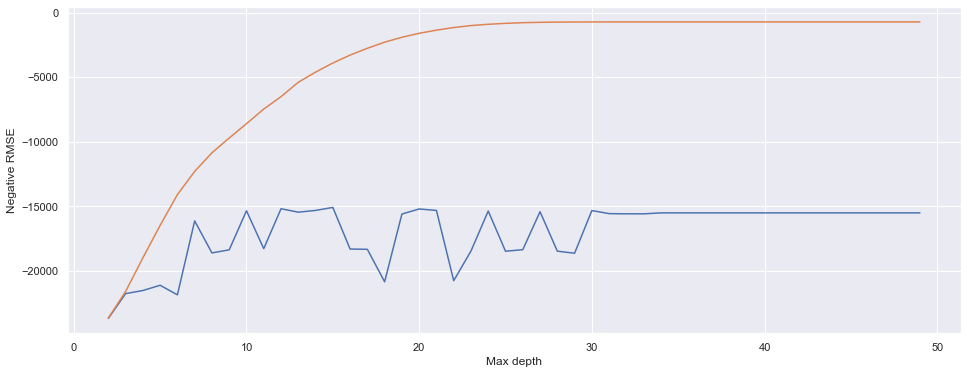

In [50]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_max_depth"], cv_results["mean_test_score"])
plt.plot(cv_results["param_max_depth"], cv_results["mean_train_score"])

plt.xlabel("Max depth")
plt.ylabel("Negative RMSE")

plt.show()

Chọn ra max_depth sao cho tỉ lệ chính xác cao nhất.

In [51]:
model_cv.best_params_


{'max_depth': 15}

Chọn ra mô hình tốt nhất và tiến hành train mô hình.

In [54]:
from sklearn.metrics import mean_squared_error
best_params = model_cv.best_params_
DT_tuning=DecisionTreeRegressor(max_depth=best_params["max_depth"],random_state=0)
DT_tuning.fit(X_train,y_train)
ypred_tuning=DT_tuning.predict(X_test)
print(DT_tuning,":",(mean_squared_error(y_test,ypred_tuning))**(1/2))



DecisionTreeRegressor(max_depth=15, random_state=0) : 15246.282976358638


Lập Frame so sánh giá xe dự đoán và giá xe thực tế.

In [55]:
test_dt=pd.DataFrame({'y':y_test,'y_predict':ypred_tuning.round(0)})
test_dt

,y,y_predict
ID,,
12774801,49790,62291.0
12688104,60114,53900.0
12834886,14990,12044.0
12688835,28990,34584.0
12747814,26850,38990.0
...,...,...
12788222,10980,10643.0
12793059,20990,19548.0
12849363,28990,28513.0
